<a href="https://colab.research.google.com/github/valero-col/Miner-a-de-Datos-jupyter/blob/main/Miner%C3%ADa_Datos_Abiertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalación e importación de librerías**

In [2]:
# Instalar librerías necesarias
!pip install pandas matplotlib seaborn folium
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import requests
import json

**Conexión y extracción de API**

In [3]:
# URL de la API
url = "https://www.datos.gov.co/resource/kcdt-jbvj.json"
# Obtener los datos
response = requests.get(url)
data = response.json()
# Convertir a DataFrame
df = pd.DataFrame(data)
# Mostrar información básica
print("📊 Estructura de los datos:")
print(f"Total registros: {len(df)}")
print("\nPrimeras filas:")
display(df.head())
# Mostrar columnas disponibles
print("\n🔍 Columnas disponibles:")
print(df.columns.tolist())


📊 Estructura de los datos:
Total registros: 71

Primeras filas:


,codigo,ruta,terminal,empresa,cartel_de_ruta_ida,recorrido,capacidad_minima,capacidad_maxima,frecuencia_de_despacho_hora_pico,hora_primer_despacho,hora_ultimo_despacho,servicio,clase,frecuencia_despacho_hora_valle,long_km,cartel_de_ruta_regreso
0,1,GALÁN MODELO ESTADIO,BARRIO GALÁN,COTRANDER,MODELO - CENTRO - UIS - CALLE 34 - ABASTOS (MO...,GALÁN - CHIMITÁ - CALLE 45 - CAMPO HERMOSO - C...,15,19,7,05:00:00 a.m.,08:00:00 p.m.,BASICO,BUS / BUSETA / MICROBUS,12,NaN,NaN
1,2,PILOTO # 6 BUENAVISTA - MORRORICO - CARRERA 9 ...,BARRIO BUENAVISTA,OPERACIÓN AUTORIZADA A UNITRANSA S.A.,BUENA VISTA - MORRO – CALLE 34 – CARRERA 9 – I...,BUENAVISTA - MORRORICO - CARRERA 33A - CALLE 3...,19,24,8,NaN,NaN,BASICO,BUS / BUSETA / MICROBUS,12,31.8,MORRO - TERMINAL - CARRERA 14 - CENTRO – HOSPI...
2,3,PILOTO # 07 BUENAVISTA - MORRORICO - CARRERA 9...,BARRIO BUENAVISTA,OPERACIÓN AUTORIZADA A UNITRANSA S.A.,BUENAVISTA – MORRO - ÁLVAREZ - CARRERA 33 - CC...,BUENAVISTA - VIA PAMPLONA BUCARAMANGA - MORROR...,18,20,8,05:00:00 a.m.,08:00:00 p.m.,BASICO,BUS / BUSETA / MICROBUS,15,22.7,MORRO – DIAMANTE II – C. C CACIQUE – CARRERA 3...
3,4,DON BOSCO - CARRERA 33 - REAL DE MINAS,DON BOSCO,OPERACIÓN AUTORIZADA A UNITRANSA S.A.,REAL DE MINAS - CARRERA 33 - CALLE 56 - LA ISL...,DON BOSCO - CARRERA 5 - CALLE 28 - CARRERA 10 ...,16,20,10,05:00:00 a.m.,07:30:00 p.m.,BASICO,BUS / BUSETA / MICROBUS,15,25.6,REAL DE MINAS - CABECERA - CALLE 34 - CENTRO -...
4,5,CARRIZAL - CALLE 45 - CABECERA - PORTÓN DEL TE...,SAN ANTONIO DE CARRIZALBOSQUES DE SAN SEBASTIÁ...,OPERACIÓN AUTORIZADA A UNITRANSA S.A.,CARRIZAL - PORTÓN - CARRERA 33 - C. C. CACIQUE...,SAN ANTONIO DE CARRIZAL - ALTERNO BOSQUES DE S...,19,23,7,5:00 a.m. - domingo festivos 5:30 a.m.,8:00 p.m. -domingos y festivos 18:00 p.m.,BASICO,BUS / BUSETA / MICROBUS,10,32.6,CARRIZAL - PORTÓN CENTRO - CAMPOHERMOSO - ABASTOS



🔍 Columnas disponibles:
['codigo', 'ruta', 'terminal', 'empresa', 'cartel_de_ruta_ida', 'recorrido', 'capacidad_minima', 'capacidad_maxima', 'frecuencia_de_despacho_hora_pico', 'hora_primer_despacho', 'hora_ultimo_despacho', 'servicio', 'clase', 'frecuencia_despacho_hora_valle', 'long_km', 'cartel_de_ruta_regreso']


**Limpieza y preparación de Datos**

In [5]:
# Versión corregida del código completo
# 1. Verificar columnas disponibles
print("Columnas disponibles en el DataFrame original:")
print(df.columns.tolist())
# 2. Filtrar columnas de interés que existan
columnas_interes = [
'nombre_establecimiento', 'departamento', 'municipio',
'sector', 'calendario', 'naturaleza',
'jornadas', 'grados_ofrecidos', 'total_matriculados'
]
columnas_existentes = [col for col in columnas_interes if col in
df.columns]
print("\nColumnas que sí existen:")
print(columnas_existentes)
# 3. Crear DataFrame limpio
df_clean = df[columnas_existentes].copy()
# 4. Mostrar resultado (CORRECCIÓN: paréntesis completo)
display(df_clean.head())
# 5. Mostrar forma del DataFrame
print("\nDataFrame limpio creado correctamente con shape:",
df_clean.shape)
try:
  # Crear DataFrame limpio
  df_clean = df[columnas_existentes].copy()
  # Mostrar información
  print("\n✅ DataFrame limpio creado exitosamente")
  print("Primeras filas:")
  display(df_clean.head()) # Correctamente cerrado
  print("\nResumen:")
  display(df_clean.info())
except Exception as e:
  print(f"\n❌ Error al crear DataFrame limpio: {e}")
  print("Columnas disponibles:", df.columns.tolist())








Columnas disponibles en el DataFrame original:
['codigo', 'ruta', 'terminal', 'empresa', 'cartel_de_ruta_ida', 'recorrido', 'capacidad_minima', 'capacidad_maxima', 'frecuencia_de_despacho_hora_pico', 'hora_primer_despacho', 'hora_ultimo_despacho', 'servicio', 'clase', 'frecuencia_despacho_hora_valle', 'long_km', 'cartel_de_ruta_regreso']

Columnas que sí existen:
[]


""
0
1
2
3
4



DataFrame limpio creado correctamente con shape: (71, 0)

✅ DataFrame limpio creado exitosamente
Primeras filas:


""
0
1
2
3
4



Resumen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Empty DataFrame


None

**Gráficos**

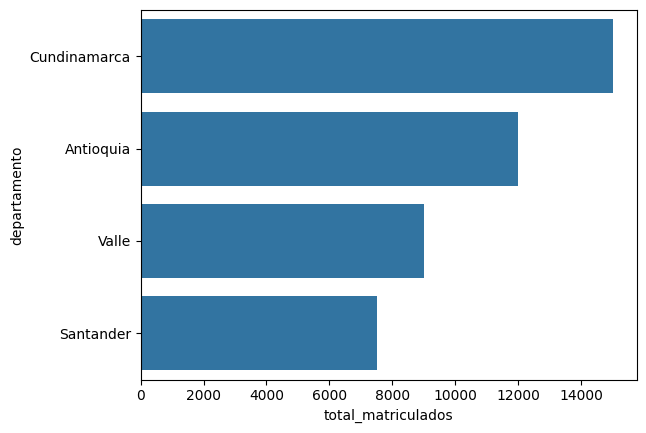

In [6]:
# Crea un pequeño dataset de prueba
test_data = pd.DataFrame({
'departamento': ['Cundinamarca', 'Antioquia', 'Valle',
'Santander'],
'total_matriculados': [15000, 12000, 9000, 7500]
})
sns.barplot(data=test_data, x='total_matriculados',
y='departamento')
plt.show()

**Análisis de datos**

In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

api_url = "https://www.datos.gov.co/resource/eh75-8ah6.json"
try:
  response = requests.get(api_url)
  response.raise_for_status()
  data = response.json()
except requests.exceptions.RequestException as e:
  print(f"Error fetching data: {e}")
  raise

df = pd.DataFrame(data)

print("DataFrame Columns:", df.columns.tolist())
print("\nFirst few rows of DataFrame:\n", df.head())
print("\nDataFrame Info:\n")
df.info()

for col in ['nombre', 'direcci_n', 'estado', 'exenci_n']:
  if col in df.columns:
    df[col] = df[col].str.strip().str.title()
  else:
    print(f"Warning: Column '{col}' not found in DataFrame")
print("\nMissing values:\n", df.isnull().sum())


if 'direcci_n' in df.columns:
  df['calle'] = df['direcci_n'].str.extract(r'^(CALLE|CARRERA|KRA)\s*\d+\w*',
  expand=False)
  df['calle'] = df['calle'].str.strip()
else:
  print("Warning: 'direcci_n' column not found, skipping street extraction")

if 'estado' in df.columns:
  status_counts = df['estado'].value_counts().reset_index()
  status_counts.columns = ['estado', 'num_establecimientos']
else:
  print("Error: 'estado' column not found. Skipping status analysis.")
  status_counts = pd.DataFrame(columns=['estado','num_establecimientos'])

if 'exenci_n' in df.columns:
  exencion_counts = df['exenci_n'].value_counts().reset_index()
  exencion_counts.columns = ['exenci_n', 'num_establecimientos']
else:
  print("Warning: 'exenci_n' column not found. Skipping tax exemption analysis.")
  exencion_counts = pd.DataFrame(columns=['exenci_n','num_establecimientos'])

if 'calle' in df.columns:
  street_counts =df['calle'].value_counts().head(10).reset_index()
  street_counts.columns = ['calle', 'num_establecimientos']
else:
  print("Warning: 'calle' column not found. Skipping street analysis.")
  street_counts = pd.DataFrame(columns=['calle','num_establecimientos'])


sns.set_style("whitegrid")

if not status_counts.empty:
  plt.figure(figsize=(10, 6))
  sns.barplot(data=status_counts, x='estado',y='num_establecimientos', palette='Blues_d')
  plt.title('Number of Establishments by Status')
  plt.xlabel('Status')
  plt.ylabel('Number of Establishments')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig('establishments_by_status.png')
  plt.close()
  print("Generated: establishments_by_status.png")
else:
  print("Skipping plot: establishments_by_status.png (no data)")

if not exencion_counts.empty:
  plt.figure(figsize=(10, 6))
  sns.barplot(data=exencion_counts, x='exenci_n',
  y='num_establecimientos', palette='Set2')
  plt.title('Number of Establishments by Tax Exemption Status')
  plt.xlabel('Tax Exemption Status')
  plt.ylabel('Number of Establishments')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig('establishments_by_exencion.png')
  plt.close()
  print("Generated: establishments_by_exencion.png")
else:
  print("Skipping plot: establishments_by_exencion.png (no data)")

if not street_counts.empty:
  plt.figure(figsize=(10, 6))
  sns.barplot(data=street_counts, x='calle',
  y='num_establecimientos', palette='Purples_d')
  plt.title('Top 10 Streets by Number of Establishments')
  plt.xlabel('Street')
  plt.ylabel('Number of Establishments')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig('top_streets.png')
  plt.close()
  print("Generated: top_streets.png")
else:
  print("Skipping plot: top_streets.png (no data)")

print("\nSummary:")
print("Status Counts:\n", status_counts)
print("\nTax Exemption Counts:\n", exencion_counts)
print("\nTop 10 Streets:\n", street_counts)









DataFrame Columns: ['terminal', 'clase_vehiculo', 'nivel_servicio', 'municipio_origen_ruta', 'municipio_destino_ruta', 'fecha_despacho', 'hora_despacho', 'tipo_despacho', 'despachos', 'pasajeros']

First few rows of DataFrame:
          terminal clase_vehiculo nivel_servicio municipio_origen_ruta  \
0  T.T. DE MAICAO            BUS           LUJO                 44430   
1  T.T. DE MAICAO            BUS           LUJO                 44430   
2  T.T. DE MAICAO            BUS           LUJO                 44430   
3  T.T. DE MAICAO            BUS           LUJO                 44430   
4  T.T. DE MAICAO            BUS           LUJO                 44430   

  municipio_destino_ruta           fecha_despacho hora_despacho tipo_despacho  \
0                  20001  2018-03-21T00:00:00.000            09        ORIGEN   
1                  68001  2018-08-28T00:00:00.000            17        ORIGEN   
2                  44001  2018-08-01T00:00:00.000            17        ORIGEN   
3        